## **Trabajo Práctico Individual n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Martina
- Apellido: Crivaro
- Legajo: 1633302

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres.

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue

In [337]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

In [340]:
#Importamos dataset como un objeto Pandas DataFrame. Al encontrarse en la misma carpeta "TP1" Solo inidico el nombre, sin dirección.
diabetes_df = pd.read_csv('ClusterAI_TP_dataset_diabetes_.csv') 
# Verificamos que se haya cargado correctamente el dataset utilizando np.shape() y .head()
print(f'Doc.Shape => {np.shape(diabetes_df)}')
print('Head:')
diabetes_df.head()

Doc.Shape => (768, 9)
Head:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [343]:
# Definimos columnas y filas del dataset con np.shape() y luego las diferenciamos del doc.shape
print(f'Dimensiones => {np.shape(diabetes_df)}')
Filas = np.shape(diabetes_df)[0]
Columnas = np.shape(diabetes_df)[1]
print(f'Cant. de Filas: {Filas}')
print(f'Cant. de Columnas: {Columnas}')

Dimensiones => (768, 9)
Cant. de Filas: 768
Cant. de Columnas: 9


##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [346]:
# PISTA: con una sola línea de código podríamos obtener toda esta información
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### **Limpieza de Datos**

Para poder avanzar de forma más prolija en los siguientes objetivos del trabajo se procede a realizar un analisis y limpieza de duplicados, simbolos y NaN, en caso de ser necesario.

*Duplicados*

Teniendo en cuenta que en la tabla no tenemos datos que diferencien a los pacientes o casos, como ser el DNI, procederemos a NO eliminar duplicados. 

*Simbolos & NaN*

Observando previamente que en las columnas solo existen datos de tipo int y float, sabemos que no hay simbolos en los datos que requieran ser limpiados. Lo mismo ocurre con datos nulos, sabemos por el analisis anterior que NO existen en la base de datos. 

##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

C:\Users\mason\AppData\Local\Temp\ipykernel_23424\1751354944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=diabetes_df, palette="Set1")


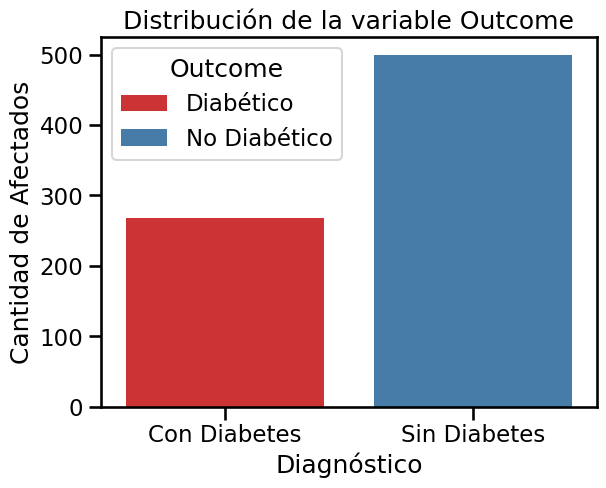

In [426]:
# Visualizo la distribución de Outcome
sns.countplot(x='Outcome', data=diabetes_df, palette="Set1")
plt.title('Distribución de la variable Outcome')
plt.xlabel('Diagnóstico')    
plt.ylabel('Cantidad de Afectados')
plt.legend(title='Outcome', labels=['Diabético', 'No Diabético'])
plt.show()

##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros.

In [353]:
# Para obtener metricas de las variables del dataset utilizamos el método provisto por panda "describe()"
# Primero definimos nuestra variable "Métricas" a la que le asignamos la información y luego la visualizamos:

Metricas = diabetes_df.describe()

# Para visualizarlo de forma más clara creamos un data frame con las descripciones en español:
Metricas2 = pd.DataFrame({
    'Cuenta': Metricas.loc['count'],
    'Media': Metricas.loc['mean'],
    'Desvío Estándar': Metricas.loc['std'],
    'Mínimo': Metricas.loc['min'],
    '25%': Metricas.loc['25%'],
    'Mediana (50%)': Metricas.loc['50%'],
    '75%': Metricas.loc['75%'],
    'Máximo': Metricas.loc['max']
})
display(Metricas2)

,Cuenta,Media,Desvío Estándar,Mínimo,25%,Mediana (50%),75%,Máximo
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

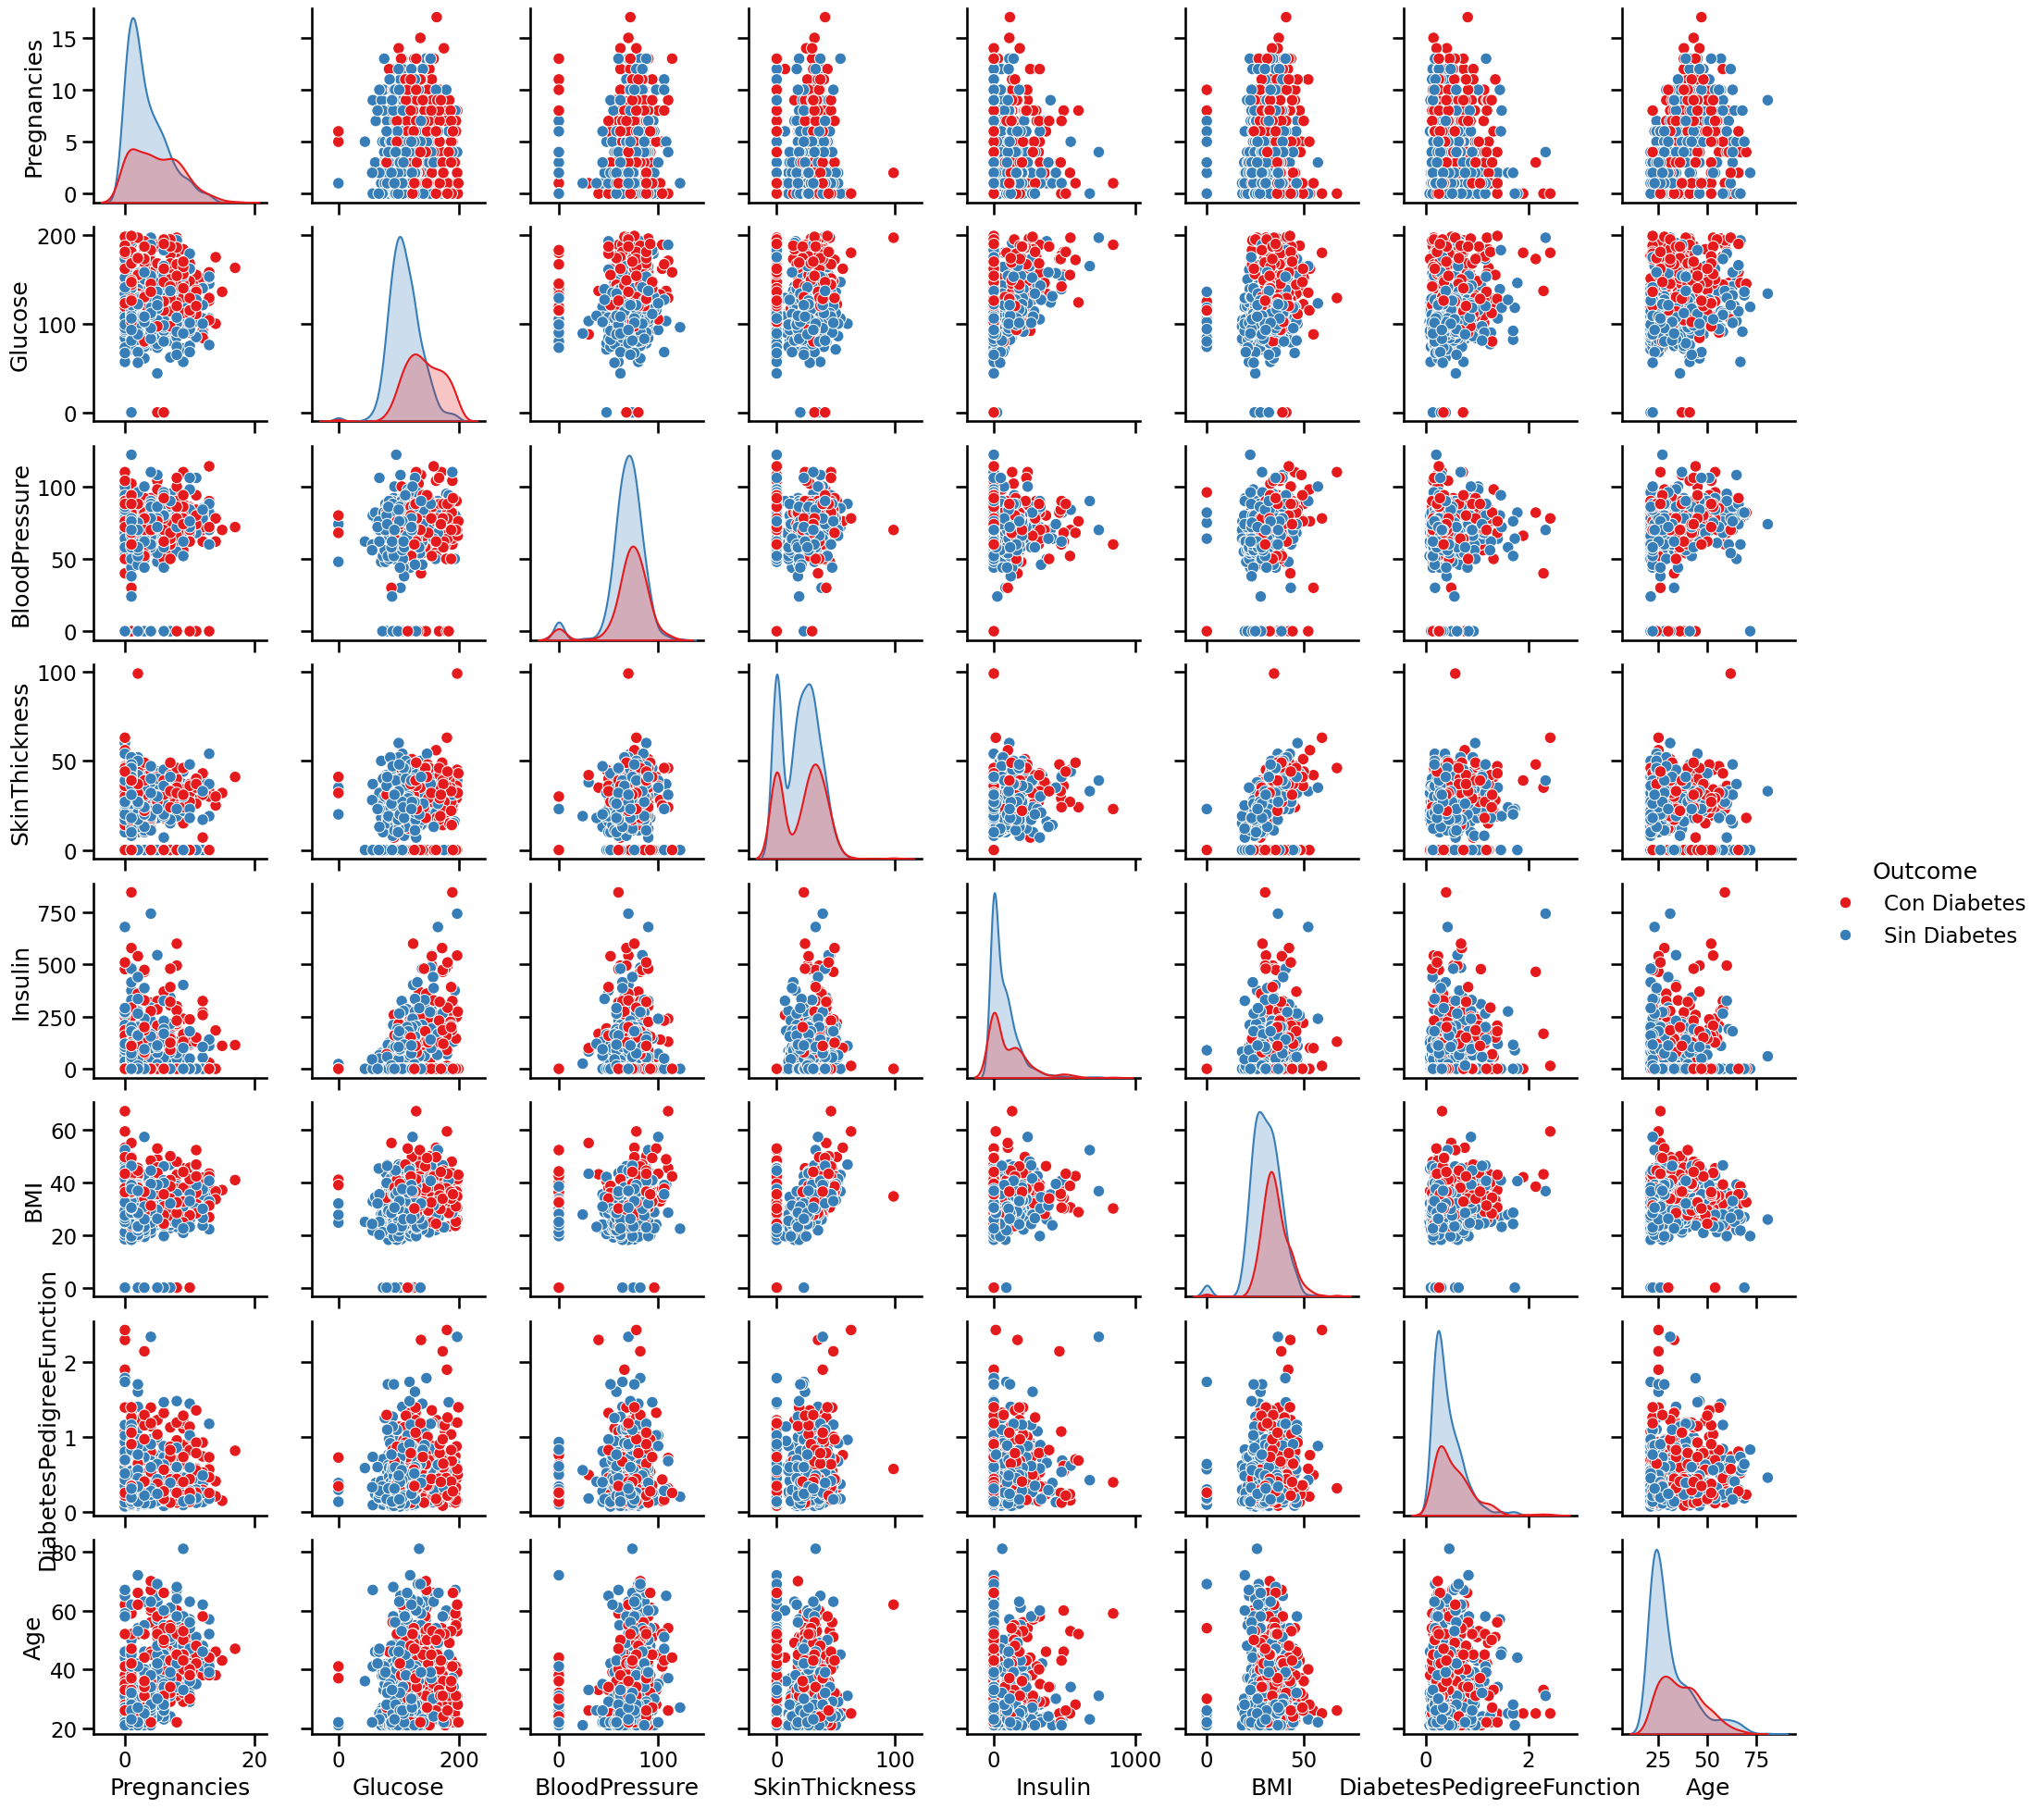

In [356]:
sns.pairplot(diabetes_df, hue="Outcome", palette="Set1")
plt.show()

##### **Conclusiones**

Como conclusión inicial, observando los valores de forma rápida podemos concluir que uno de los factores que más infiere es el BMI o indice de masa corporal, demostrandose que a mayor masa corporal, mayor probabilidad de diabetes, de acuerdo con el histograma. 
Ademàs, observando los scatterplot de la glucosa, tambien siempre los casos de diabetes son para valores altos de la misma. 
En cambio, el resto de los valores se ven distribuidos de manera bastante uniforme. 

##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos pares de variables más correlaciondas?
- Que valor y tipo de correlación tienen?
- Podríamos tomar alguna decisión con respecto a esto? Cuál?

Dimension de la matriz: 
(9, 9)
Matriz de Correlaciòn: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


HeatMap de Matriz de Correlaciòn: 
Axes(0.125,0.11;0.62x0.77)


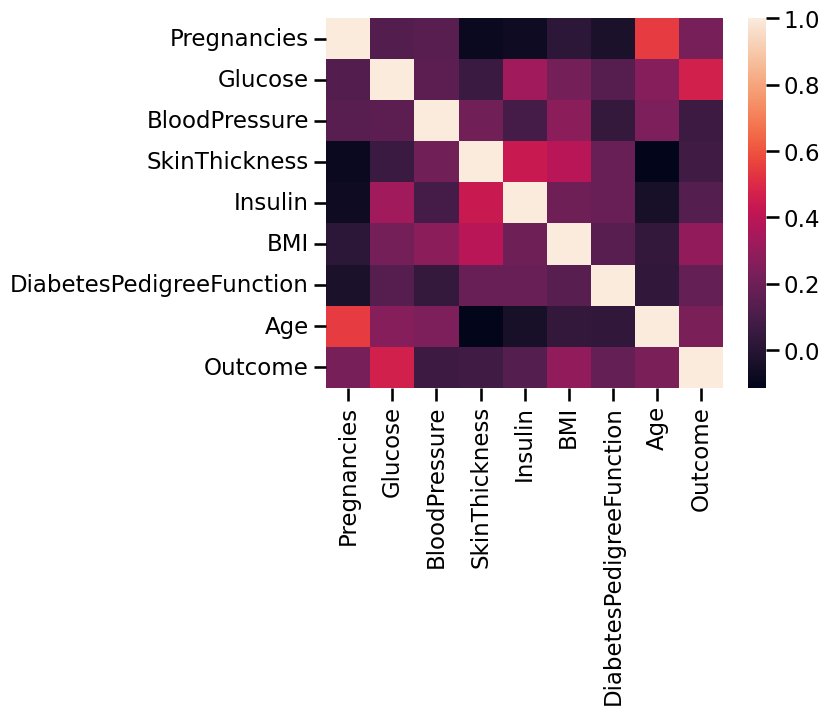

In [434]:
Var_c_corr = diabetes_df.corr()
# observamos las dimensiones de esta matriz
print('Dimension de la matriz: ')
print(np.shape(Var_c_corr))
# visualizamos la matriz de correlacion
print('Matriz de Correlaciòn: ')
display(Var_c_corr)
# visualizamos el HeatMap de la matriz de correlacion para ayudarnos visualmente a definir màs rapido cuales se correlacionan y luego confirmarlo nuevamente en el cuadro
print('HeatMap de Matriz de Correlaciòn: ')
print(sns.heatmap(Var_c_corr))

##### **CORRELACIÒN DE VARIABLES**

- Cuales son los dos pares de variables más correlaciondas?
Observando el HeatMap podemos definir de forma clara que los dos pares de variables màs correlacionadas son:
1. Edad y Embarazos: su correlaciòn es de 0.54 positiva. Es decir, hay una tendencia de que a mayor edad mayor posibilidad de embarazo, pero no necesariamente una es causa de la otra. Sin embargo, esta correlaciòn no nos inidica ninguna conclusiòn importante es nuestro caso de estudio particular que refiere especificamente a pacientes con o sin diabetes. Teniendo en cuenta esto, al tener una alta correlaciòn podemos eliminar una variable. En este caso, siendo que el embarazo no porporciona ningun dato relevante, podemos eliminarlo de unstra base de datos.  
2. Glucosa y Outcome: Su correlacion es de 0.47 positiva. Es decir, a mayor glucosa en sangre es màs probable que la persona tenga diabetes, pero no necesariamente por esto si un paciente posee alta cantidad de glucosa sea diabètico. Si bien la correlaciòn en este caso tambien es alta, consideramos que ambos valores son importantes como para eliminarlos. 

##### **Objetivo 8**
Hacer un histograma de la variable BMI

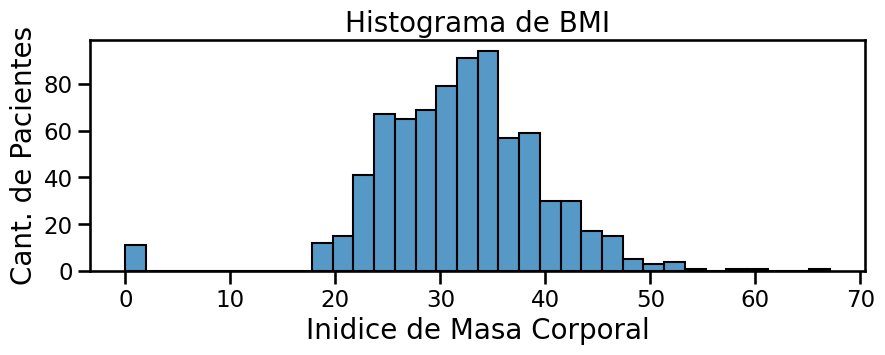

In [362]:
#Histograma BMI
plt.figure(figsize=(10,3))
sns.histplot(data=diabetes_df, x='BMI', stat='count', kde=False)
plt.xlabel("Inidice de Masa Corporal",size = 20)
plt.ylabel("Cant. de Pacientes",size = 20)
plt.title('Histograma de BMI',size = 20)
plt.show()

##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.

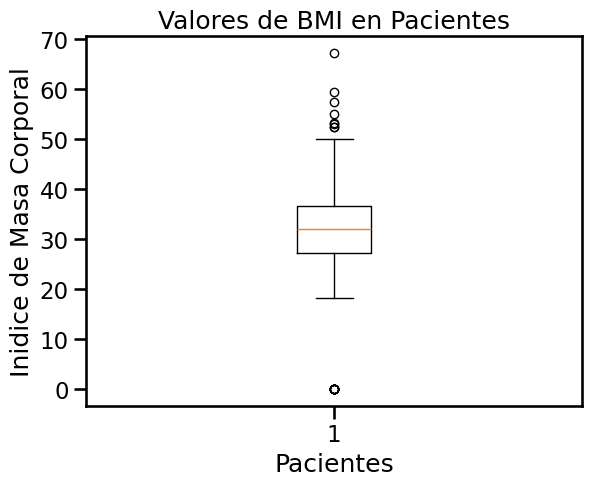

In [364]:
# Al observar el histograma podemos notar que existe AL MENOS un paciente cuyo inidice de masa corporal se indica como "0"
# Realizamos un BoxPlot para corroborar que valores se encuentran por fuera de la probabilidad de ocurrencia
BMIbxplot = plt.boxplot(x = "BMI", data =  diabetes_df)
plt.title("Valores de BMI en Pacientes")
plt.ylabel('Inidice de Masa Corporal')
plt.xlabel('Pacientes')
plt.show()


##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

Métricas BMI sin filtrar
Valor Mediana:
 32.0

[Q1 - Q3] : [27.3 - 36.6]

[Inferior  - Superior]: [18.2 - 50.0] 

Valores outliers:
[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  53.2 55.  67.1
 52.3 52.3 52.9 59.4 57.3]

BOXPLOT BMI FILTRADO


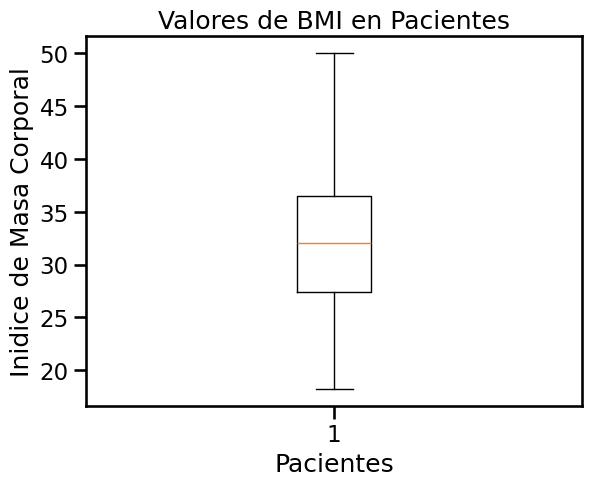

Tamaño Original del DataSet => (768, 9)
Tamaño Filtrado del DataSet => (749, 9)


In [440]:
# Para filtrar el dataset de los valores atipicos de BMI, primero definimos su mediana y limites inferior y superior y visualizamos:
medians = BMIbxplot["medians"][0].get_ydata()
low_limits = BMIbxplot["whiskers"][0].get_ydata()
up_limits = BMIbxplot["whiskers"][1].get_ydata()
Q1 =  low_limits[0]
Q3 =  up_limits[0]
low_whiskers =  low_limits[1]
up_whiskers = up_limits[1]
outliers = BMIbxplot["fliers"][0].get_ydata()
print('Métricas BMI sin filtrar')
print(f'Valor Mediana:\r\n {medians[0]}\r\n')
print(f'[Q1 - Q3] : [{Q1} - {Q3}]\r\n')
print(f'[Inferior  - Superior]: [{low_whiskers} - {up_whiskers}] \r\n')
print(f'Valores outliers:\r\n{outliers}\r\n')

# Una vez definido procedemos a eliminar aquellos valores que esten por encima y por debajo de los whiskers o bigotes:
filtered_diabetes_df = diabetes_df[(diabetes_df['BMI'] >= low_whiskers) & (diabetes_df['BMI'] <= up_whiskers)]

# Volvemos a observar el BoxPlot de BMI en el dataframe ahora filtrado:
print('BOXPLOT BMI FILTRADO')
BMIbxplot2 = plt.boxplot(x = "BMI", data =  filtered_diabetes_df)
plt.title("Valores de BMI en Pacientes")
plt.ylabel('Inidice de Masa Corporal')
plt.xlabel('Pacientes')
plt.show()

# Ahora diferenciamos la cantidad de valores previo y post el proceso de filtro:
print(f'Tamaño Original del DataSet => {np.shape(diabetes_df)}')
print(f'Tamaño Filtrado del DataSet => {np.shape(filtered_diabetes_df)}')

##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar?

C:\Users\mason\AppData\Local\Temp\ipykernel_23424\1819755981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_diabetes_df['Outcome'] = filtered_diabetes_df['Outcome'].replace({0: 'Sin Diabetes', 1: 'Con Diabetes'})
C:\Users\mason\AppData\Local\Temp\ipykernel_23424\1819755981.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=filtered_diabetes_df,


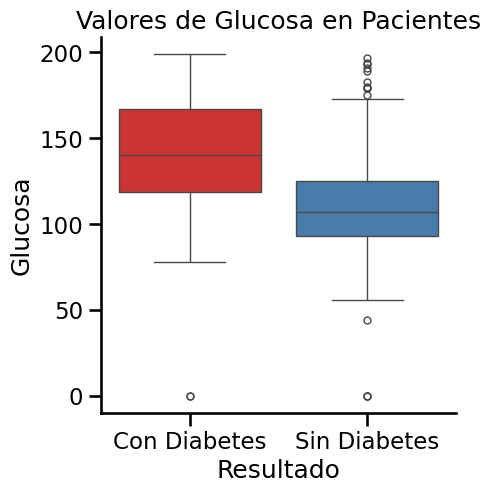

In [442]:
# Reemplazo los valores 0 y 1 por 'Sin Diabetes' y 'Con Diabetes' en la columna "Outcome" para una visualización más clara
filtered_diabetes_df['Outcome'] = filtered_diabetes_df['Outcome'].replace({0: 'Sin Diabetes', 1: 'Con Diabetes'})
# Genero y visualizo el boxplot
g = sns.catplot(data=filtered_diabetes_df,
                x="Outcome",y="Glucose", 
                kind="box", palette="Set1")
plt.title("Valores de Glucosa en Pacientes")
plt.ylabel('Glucosa')
plt.xlabel('Resultado')
plt.show()

##### **Observación**

Tal como habiamos notado anteriormente, en conclusiones prematuras, la glucosa en personas con diabetes es más alta que en personas sin diabetes. Nuevamente, el tener glucosa alta no significa necesariamente ser diabetico, pero si es un factor muy importante al que el paciente deberá prestar atención ya que poseen una alta correlación positiva. 

##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál?

C:\Users\mason\AppData\Local\Temp\ipykernel_23424\3075157341.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_diabetes_df['Outcome'] = filtered_diabetes_df['Outcome'].replace({'Sin Diabetes': 0, 'Con Diabetes': 1})
C:\Users\mason\AppData\Local\Temp\ipykernel_23424\3075157341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_diabetes_df['Outcome'] = filtered_diabetes_df['Outcome'].replace({'Sin Diabetes': 0, 'Con Diabetes': 1})


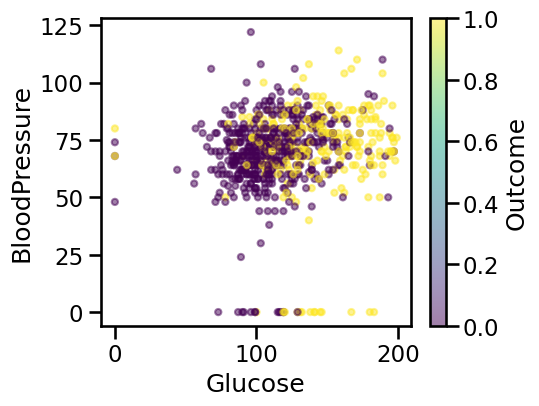

In [444]:
# Revierto el reemplazo de los valores 0 y 1 por 'Sin Diabetes' y 'Con Diabetes' en la columna "Outcome" para poder realizar la matriz
filtered_diabetes_df['Outcome'] = filtered_diabetes_df['Outcome'].replace({'Sin Diabetes': 0, 'Con Diabetes': 1})
#Genero y visualizo el ScatterPlott
filtered_diabetes_df.plot(kind='scatter', x='Glucose', y='BloodPressure', c='Outcome', 
        cmap=plt.get_cmap(), colorbar=True, alpha=0.5, figsize=(5,4))
plt.show()

##### **Observación**

Luego de observar el grafico podemos nuevamente notar la correlación de alta glucosa y pacientes diabeticos. Pero entre las variables analizadas, glucosa y presión sanguinea, no encontramos ningun patrón especifico que demuestre una alta correlación entre las variables. 

##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [452]:
# Defino limites entre 30 y cuarenta y las labels de cada rango
bins = [0, 30, 40, float('inf')]
labels = ['< 30', '30 <E< 40', '> 40']

# Creo la nueva Variable Rango de Edad
filtered_diabetes_df['RangoEdad'] = pd.cut(filtered_diabetes_df['Age'], bins=bins, labels=labels, right=False)

# Visualizo las primeras filas para observar como quedó
print(filtered_diabetes_df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  RangoEdad  
0                     0.627   50        1       > 40  
1                     0.351   31        0  30 <E< 40  
2                     0.672   32        1  30 <E< 40  
3                     0.167   21        0       < 30  
4                     2.288   33        1  30 <E< 40  


C:\Users\mason\AppData\Local\Temp\ipykernel_23424\995827614.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_diabetes_df['RangoEdad'] = pd.cut(filtered_diabetes_df['Age'], bins=bins, labels=labels, right=False)


##### **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál?

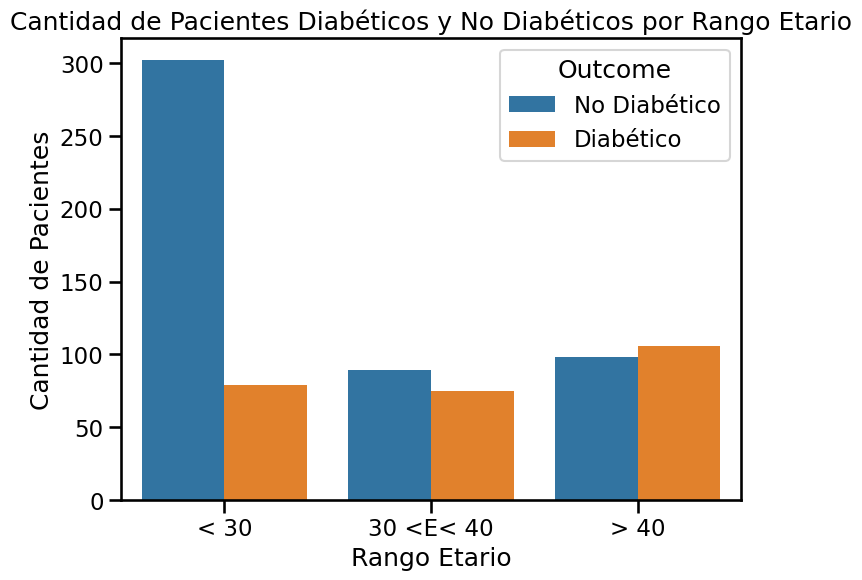

In [462]:
# Crear el count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_diabetes_df, x='RangoEdad', hue='Outcome')

# Añadir etiquetas y título
plt.title('Cantidad de Pacientes Diabéticos y No Diabéticos por Rango Etario')
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de Pacientes')
plt.legend(title='Outcome', labels=['No Diabético', 'Diabético'])
plt.show()

##### **Conclusión**

Tal como podemos observar, en las personas **mayores a 40 años** hay más casos de pacientes **con diabetes** que sin diabetes. Es decir, aún cuando los graficos presentados y la correlación lineal analizada anteriormente no nos habian arrojado resultados siginficativos, podemos decir que a mayor edad del paciente, mayor probabilidad de que tenga diabetes, pero eso no necesariamente indica que toda persona mayor de 40 tendrá diabetes. 

Entonces, en base a todos los datos analizados y observados, podemos concluir que está claro que los niveles altos de **glucosa** son un gran indicador de diabetes, con una relación bastante fuerte. Además, la **edad** también juega un papel importante, ya que las personas mayores de 40 años parecen estar más en riesgo de desarrollar diabetes. Entonces, con estos dos valores, y tomando otros que hemos podido notar relevantes pero no tanto, como ser el BMI y la presion arterial, es posible precedir la diabetes en un paciente, y actuar en consecuencia para prevenirlo o reducir los efectos. 